In [1]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math
import json
from pandas.io.json import json_normalize

In [2]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

pensActivity = pd.read_sql('SELECT * FROM PensActivity', con=db_connection)
pensActivity['created'] = pd.to_datetime(pensActivity['created'], unit='s')
pensActivity['lastmodified'] = pd.to_datetime(pensActivity['lastmodified'], unit='s')
pensActivity['created'].replace(0, np.nan, inplace=True)
pensActivity['lastmodified'].replace(0, np.nan, inplace=True)
pensActivity['notes'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
pensActivity['notes'] = pensActivity['notes'].astype('category')
pensActivity.sort_values(by='created', inplace=True)

In [3]:
pensActivity
#maybe i need to drop columns : status_id, notes, time_to_process

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items
131729,1509709,5,25d0ca6227e881c0f38c088d9f424737ec2773e1,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2014-12-15 15:32:19,2014-12-15 15:32:19,0,2
628374,1509661,1509681,b4737a3d142bb06f6d70dd02bd64f6a956792e59,"{""pen_uid"":""91ff826f0b001e00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:52:19,2014-12-15 15:52:19,0,7
473963,1509705,1509673,8810c7196f7f12237868251ff4b34ffe1e2a6d99,"{""pen_uid"":""90ff826f0a001d00"",""initial_time_st...",Insufficient permissions for object at index 3,0,2014-12-15 15:56:09,2014-12-15 15:56:09,0,5
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,"{""pen_uid"":""91ff826f08001b00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:56:30,2014-12-15 18:11:49,0,6
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,"{""pen_uid"":""91ff826f22001600"",""initial_time_st...",Insufficient permissions for object at index 2,0,2014-12-15 15:58:11,2014-12-15 18:10:29,0,6
...,...,...,...,...,...,...,...,...,...,...
494124,132777683,1524473,8de20189e64f86c4f892b98ca7d30077b00b3874,"{""ticket_id"":""tzctj"",""registers"":""None"",""colle...",NaN,1,2020-07-02 20:22:39,2020-07-02 20:22:39,161,1
676664,132794701,1524473,c24003e782909cd4a8385fd84970943237aa605b,"{""ticket_id"":""gz65"",""registers"":""None"",""collec...",NaN,1,2020-07-06 17:42:37,2020-07-06 17:42:37,159,1
283113,132806719,1524473,513e424fc16895f97ae6e70e9bb74f9a58c59229,"{""ticket_id"":""56bs6"",""registers"":""None"",""colle...",NaN,1,2020-07-09 13:12:38,2020-07-09 13:12:38,172,1
595596,132806727,1524473,ab224c85d1194f9136c2903b41c6f56a34d7875b,"{""ticket_id"":""cvszd"",""registers"":""None"",""colle...",NaN,1,2020-07-09 13:16:52,2020-07-09 13:16:52,122,1


In [4]:
pensActivity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892213 entries, 131729 to 696049
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   visit_id         892213 non-null  int64         
 1   pen_id           892213 non-null  int64         
 2   fingerprint      892213 non-null  object        
 3   activity         892213 non-null  object        
 4   notes            8 non-null       category      
 5   status_id        892213 non-null  int64         
 6   created          892213 non-null  datetime64[ns]
 7   lastmodified     892213 non-null  datetime64[ns]
 8   time_to_process  892213 non-null  int64         
 9   count_items      892213 non-null  int64         
dtypes: category(1), datetime64[ns](2), int64(5), object(2)
memory usage: 68.9+ MB


In [58]:
pensActivity.describe()
#count is a total of NAN missing rows

,visit_id,pen_id,count_items,time_spent
count,8.922130e+05,8.922130e+05,892213.000000,892213
mean,1.040977e+08,1.539013e+06,24.663077,0 days 00:02:00.647263
std,2.797603e+07,1.923735e+05,39.960441,0 days 05:01:37.169825
min,0.000000e+00,0.000000e+00,0.000000,0 days 00:00:00
25%,9.570889e+07,1.521253e+06,5.000000,0 days 00:00:00
50%,1.103950e+08,1.522861e+06,12.000000,0 days 00:00:00
75%,1.213357e+08,1.524457e+06,28.000000,0 days 00:00:01
max,1.328067e+08,3.860073e+06,1235.000000,78 days 17:57:05


In [60]:
pensActivity['visit_id'].value_counts()

1526919      457
1585363      133
1586155      104
97337717      39
113393783     35
            ... 
131027791      1
116966907      1
108675693      1
114027013      1
0              1
Name: visit_id, Length: 528818, dtype: int64

## breakdown activity by time 

In [5]:
activity_by_month = pensActivity['created'].groupby(pensActivity.created.dt.to_period("M")).agg('count')
activity_by_month.nlargest(10)

created
2016-07    35738
2016-04    31879
2016-05    30390
2016-08    30167
2016-03    27818
2016-06    26796
2016-02    22013
2017-07    21676
2016-10    21140
2016-12    20671
Freq: M, Name: created, dtype: int64

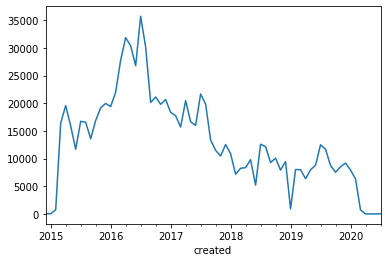

In [6]:
activity_by_month.plot()

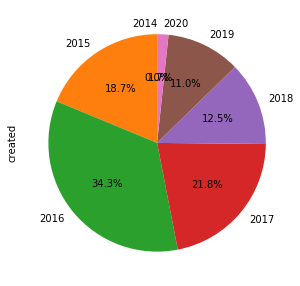

In [8]:
activity_by_year = pensActivity['created'].groupby(pensActivity.created.dt.to_period("Y")).agg('count')
activity_by_year.plot.pie(y='created', figsize=(5, 5),autopct='%1.1f%%', startangle=90)

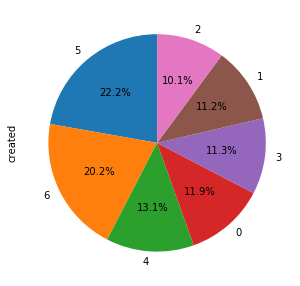

In [9]:
popular_days = pensActivity['created'].groupby(pensActivity.created.dt.weekday).agg('count').sort_values(ascending=False)
popular_days.plot.pie(y='created', figsize=(5, 5),autopct='%1.1f%%', startangle=90)

In [10]:
popular_days.nlargest()

created
5    198155
6    180288
4    116453
0    106043
3    100788
Name: created, dtype: int64

In [11]:
#zooming to Adam timeframe 
start_date = '01-01-2019'
end_date = '07-31-2019'
mask = (pensActivity['created'] > start_date) & (pensActivity['created'] <= end_date)
sevenMonths = pensActivity.loc[mask]
sevenMonths

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items
275984,126517331,1520347,4f3b1cd4cb190b8e2c636e292b99738788cc8135,"{""pen_uid"":""55db816f20002700"",""initial_time_st...",NaN,1,2019-01-01 03:00:06,2019-01-01 03:00:06,126,9
256494,126524581,1520747,499e12bbcb2e2ad78624d146e685e3b3a0281fc5,"{""pen_uid"":""585f836f01001600"",""initial_time_st...",NaN,1,2019-01-01 03:00:06,2019-01-01 03:00:06,203,4
148321,126525141,1522483,2a9a15fcebc4479f626078ef5aac3a8cf46b3a00,"{""pen_uid"":""595f836f0e000e00"",""initial_time_st...",NaN,1,2019-01-01 03:00:06,2019-01-01 03:00:06,80,1
678347,126525111,1524367,c2baae1b9f0c0f1bc0ae714918f0cc45bc309b15,"{""pen_uid"":""90ff826f01001300"",""initial_time_st...",NaN,1,2019-01-01 03:00:07,2019-01-01 03:00:09,1292,41
767242,126520961,1523411,dc435a2fdd5bea8fe9417ef3877108333a9b03a4,"{""pen_uid"":""595f836f20000100"",""initial_time_st...",NaN,1,2019-01-01 03:00:07,2019-01-01 03:00:07,328,8
...,...,...,...,...,...,...,...,...,...,...
85425,129003719,1522207,1882b81f30ee3cfc322f8c285f539b33250086d2,"{""pen_uid"":""595f836f03001300"",""initial_time_st...",NaN,1,2019-07-30 21:46:56,2019-07-30 21:46:57,565,15
317724,129003621,1522129,5b26c926d5cc77a3cc3f5d7db11dbe4f1879be67,"{""pen_uid"":""585f836f2d001c00"",""initial_time_st...",NaN,1,2019-07-30 21:48:04,2019-07-30 21:48:05,1204,40
111957,129005869,1525267,2015028f67014de87ba4fbbbf5fd03e3ebf9f384,"{""pen_uid"":""91ff826f0e002600"",""initial_time_st...",NaN,1,2019-07-30 21:50:29,2019-07-30 21:50:29,1036,32
281455,129005865,1524337,50cd8426614cb3fa964c8f6c56bd21dc15f917f8,"{""pen_uid"":""595f836f31001900"",""initial_time_st...",NaN,1,2019-07-30 21:50:49,2019-07-30 21:50:49,399,20


In [12]:
sevenMonths.count()
# in between adam timeframe 52,259 (what is it registration? activities?)

visit_id           52259
pen_id             52259
fingerprint        52259
activity           52259
notes                  0
status_id          52259
created            52259
lastmodified       52259
time_to_process    52259
count_items        52259
dtype: int64

## average time use
#### not very interesting since I can't trust lastmodified as time end

In [13]:
pensActivity[['created', 'lastmodified']]

,created,lastmodified
131729,2014-12-15 15:32:19,2014-12-15 15:32:19
628374,2014-12-15 15:52:19,2014-12-15 15:52:19
473963,2014-12-15 15:56:09,2014-12-15 15:56:09
771570,2014-12-15 15:56:30,2014-12-15 18:11:49
760275,2014-12-15 15:58:11,2014-12-15 18:10:29
...,...,...
494124,2020-07-02 20:22:39,2020-07-02 20:22:39
676664,2020-07-06 17:42:37,2020-07-06 17:42:37
283113,2020-07-09 13:12:38,2020-07-09 13:12:38
595596,2020-07-09 13:16:52,2020-07-09 13:16:52


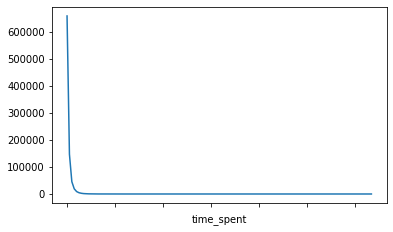

In [14]:
pensActivity['time_spent'] = pensActivity['lastmodified'] - pensActivity['created']
less_day = pensActivity['time_spent'] < '1day'
mask_day = pensActivity[less_day]
mask_day.groupby('time_spent').size().plot()

In [15]:
above_five = pensActivity['time_spent'] > '00:05:00'
range_time = pensActivity[less_day & above_five]
range_time

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items,time_spent
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,"{""pen_uid"":""91ff826f08001b00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:56:30,2014-12-15 18:11:49,0,6,02:15:19
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,"{""pen_uid"":""91ff826f22001600"",""initial_time_st...",Insufficient permissions for object at index 2,0,2014-12-15 15:58:11,2014-12-15 18:10:29,0,6,02:12:18
249259,1510757,1510711,478c528669c311186e9e7e8e88749b9d643cd657,"{""pen_uid"":""90ff826f19002b00"",""initial_time_st...",NaN,1,2014-12-18 18:34:08,2014-12-18 18:54:15,0,10,00:20:07
162136,1513941,1510727,2e8c2f6023bf8cee5dc66add87c8ae490466b0cb,"{""pen_uid"":""90ff826f13001000"",""initial_time_st...",NaN,1,2015-01-07 22:08:42,2015-01-08 14:58:41,0,10,16:49:59
446137,1513939,1510725,801476732d0487079f13d768fabeb129e066e033,"{""pen_uid"":""91ff826f06002100"",""initial_time_st...",NaN,1,2015-01-07 22:09:06,2015-01-08 14:58:24,0,11,16:49:18
738129,1513941,1526385,d3f4b4d8c781055c7878e5dbf5d6c696493783fd,"{""pen_uid"":""595f836f1d001b00"",""initial_time_st...",NaN,1,2015-02-04 00:37:42,2015-02-04 14:28:18,0,4,13:50:36
824417,1528353,1526385,ec93f0a1ba2eb24d24c440583cec25d2fd895df8,"{""pen_uid"":""595f836f1d001b00"",""initial_time_st...",NaN,1,2015-02-12 17:24:17,2015-02-13 17:07:41,0,1,23:43:24
117606,1528353,1526385,21b8111960c2781fefd08b7b770e95ddb1f566c7,"{""pen_uid"":""595f836f1d001b00"",""initial_time_st...",NaN,1,2015-02-12 17:24:18,2015-02-13 17:07:42,0,2,23:43:24
464811,1528447,1526691,857bbc53fc78c471080ba1d8dc625ba4113105a3,"{""pen_uid"":""585f836f18001000"",""initial_time_st...",NaN,1,2015-02-12 18:53:16,2015-02-12 19:24:35,0,17,00:31:19
144072,1513941,1510727,2960f7cfec0513386bed4c0a1a815d9395d17220,"{""pen_uid"":""90ff826f13001000"",""initial_time_st...",NaN,1,2015-03-03 23:26:42,2015-03-04 17:04:21,0,7,17:37:39


In [16]:
range_time.info() 
#only 42 entries that are less than a day and more than 5 min

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 771570 to 58754
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   visit_id         42 non-null     int64          
 1   pen_id           42 non-null     int64          
 2   fingerprint      42 non-null     object         
 3   activity         42 non-null     object         
 4   notes            2 non-null      category       
 5   status_id        42 non-null     int64          
 6   created          42 non-null     datetime64[ns] 
 7   lastmodified     42 non-null     datetime64[ns] 
 8   time_to_process  42 non-null     int64          
 9   count_items      42 non-null     int64          
 10  time_spent       42 non-null     timedelta64[ns]
dtypes: category(1), datetime64[ns](2), int64(5), object(2), timedelta64[ns](1)
memory usage: 3.8+ KB


In [17]:
range_time.groupby('time_spent').size()

time_spent
00:05:16    1
00:05:24    1
00:05:54    1
00:07:44    1
00:09:17    1
00:09:23    1
00:10:58    1
00:11:08    1
00:12:09    1
00:13:23    1
00:14:49    1
00:15:34    1
00:16:33    1
00:18:22    1
00:20:07    1
00:26:07    1
00:27:56    1
00:28:10    1
00:31:19    1
00:31:31    1
00:31:40    1
00:31:51    1
00:34:12    1
00:34:14    1
00:45:05    1
00:45:46    1
00:49:22    1
00:55:09    1
00:57:12    1
00:58:20    1
01:35:04    1
02:12:18    1
02:15:19    1
04:19:34    1
07:35:03    1
08:30:17    1
13:50:36    1
16:49:18    1
16:49:59    1
17:37:39    1
23:43:24    2
dtype: int64

In [18]:
range_time['time_spent'].mean()

Timedelta('0 days 03:36:48.333333')

In [19]:
over_day = pensActivity['time_spent'] > '1day'
pensActivity[over_day]

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items,time_spent
279607,1509705,1509673,50461ab47cab2c8e2b04c87257c45c4dae4f872e,"{""pen_uid"":""90ff826f0a001d00"",""initial_time_st...",NaN,1,2014-12-15 21:07:40,2015-02-04 00:10:05,0,2,50 days 03:02:25
504639,1509661,987051,90dbcc0c0e2b7e41696c73170bdc17fd8a564e82,"{""pen_uid"":""90ff826f09001300"",""initial_time_st...",NaN,1,2014-12-15 21:42:02,2014-12-18 17:12:59,0,4,2 days 19:30:57
160430,1509705,1509673,2e0b5883e3d730324c318dd69915fddde1d77153,"{""pen_uid"":""90ff826f0a001d00"",""initial_time_st...",NaN,1,2014-12-15 21:42:19,2014-12-18 17:13:01,0,11,2 days 19:30:42
745239,1509687,1509683,d5f946b3127654124b99c9ce63ded3c7dce145e8,"{""pen_uid"":""91ff826f22001600"",""initial_time_st...",NaN,1,2014-12-15 21:44:36,2014-12-18 17:13:03,0,7,2 days 19:28:27
303857,1509379,1509677,57291be8fc50e58ccce51d2dc143b70ef2211bf1,"{""pen_uid"":""91ff826f08001b00"",""initial_time_st...",NaN,1,2014-12-15 21:45:17,2014-12-18 17:13:05,0,3,2 days 19:27:48
...,...,...,...,...,...,...,...,...,...,...,...
744349,1652507,1524993,d5b95f3214b4788f985cc5853a3649c767318b8b,"{""pen_uid"":""90ff826f1c000d00"",""initial_time_st...",NaN,1,2015-03-05 22:22:50,2015-03-09 00:47:57,536,87,3 days 02:25:07
146138,1652495,1522925,29fbb11344e87d9370938e092c46f5e233b235cf,"{""collection"":[{""record_data"":""chsdm:o:5168133...",NaN,1,2015-03-06 15:15:23,2015-03-09 01:50:22,1043,302,2 days 10:34:59
419049,1652511,1523211,783f576ead576538e99a6c5f90c69bdc96a1d27d,"{""collection"":[{""record_data"":""chsdm:o:5149762...",NaN,1,2015-03-06 21:01:46,2015-03-09 01:40:34,1087,186,2 days 04:38:48
670731,2147585,1519921,c08df73c2a250fdc715fe5011a6f95bc462b8bfd,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2015-03-07 04:13:45,2015-03-08 04:58:47,63,2,1 days 00:45:02


## the most used pens

In [61]:
pensActivity['pen_id'].value_counts()

1521687    1480
1525511    1288
1523121    1184
1521555    1107
1519959    1104
           ... 
1526873       1
1520715       1
1523419       1
1523925       1
0             1
Name: pen_id, Length: 3010, dtype: int64

In [57]:
pensActivity.groupby('pen_id').size().nlargest(10)

pen_id
1521687    1480
1525511    1288
1523121    1184
1521555    1107
1519959    1104
1523605    1093
1520277    1048
1521201    1020
1520023     987
1521525     969
dtype: int64

In [21]:
by_items = pensActivity[['pen_id', 'count_items']]
by_items.sort_values(by='count_items', ascending =False).head(10)

,pen_id,count_items
212891,1526757,1235
344757,1519901,1183
700658,1522701,1082
418459,1526757,1066
265091,1522701,943
417713,1520305,911
105805,1522193,872
382639,1523891,859
768639,1523523,851
642377,1522291,830


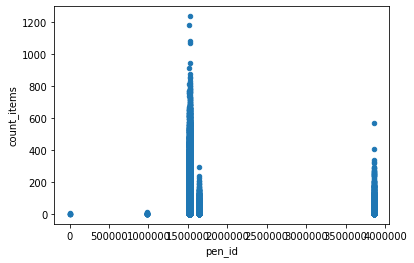

In [22]:
plt.rcParams['agg.path.chunksize'] = 40000
by_items.plot(x='pen_id', y='count_items', kind='scatter')

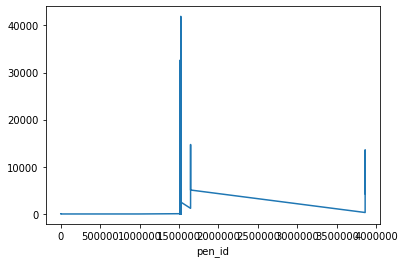

In [23]:
sum_per_pen = by_items.groupby(["pen_id"]).count_items.sum()
sum_per_pen.plot()
#what are these pens that collected huge amount of items compare to the others?

In [24]:
sum_per_visit = pensActivity.groupby(["visit_id"]).count_items.sum()
sum_per_visit

visit_id
0             2
904949       64
1049087      16
1050651      20
1050661       4
             ..
132777683     1
132794701     1
132806719     1
132806727     1
132806735     1
Name: count_items, Length: 528818, dtype: int64

In [25]:
pensActivity[pensActivity['count_items'] < 500]
#more the 500 items per visit is fishy

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items,time_spent
131729,1509709,5,25d0ca6227e881c0f38c088d9f424737ec2773e1,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2014-12-15 15:32:19,2014-12-15 15:32:19,0,2,00:00:00
628374,1509661,1509681,b4737a3d142bb06f6d70dd02bd64f6a956792e59,"{""pen_uid"":""91ff826f0b001e00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:52:19,2014-12-15 15:52:19,0,7,00:00:00
473963,1509705,1509673,8810c7196f7f12237868251ff4b34ffe1e2a6d99,"{""pen_uid"":""90ff826f0a001d00"",""initial_time_st...",Insufficient permissions for object at index 3,0,2014-12-15 15:56:09,2014-12-15 15:56:09,0,5,00:00:00
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,"{""pen_uid"":""91ff826f08001b00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:56:30,2014-12-15 18:11:49,0,6,02:15:19
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,"{""pen_uid"":""91ff826f22001600"",""initial_time_st...",Insufficient permissions for object at index 2,0,2014-12-15 15:58:11,2014-12-15 18:10:29,0,6,02:12:18
...,...,...,...,...,...,...,...,...,...,...,...
494124,132777683,1524473,8de20189e64f86c4f892b98ca7d30077b00b3874,"{""ticket_id"":""tzctj"",""registers"":""None"",""colle...",NaN,1,2020-07-02 20:22:39,2020-07-02 20:22:39,161,1,00:00:00
676664,132794701,1524473,c24003e782909cd4a8385fd84970943237aa605b,"{""ticket_id"":""gz65"",""registers"":""None"",""collec...",NaN,1,2020-07-06 17:42:37,2020-07-06 17:42:37,159,1,00:00:00
283113,132806719,1524473,513e424fc16895f97ae6e70e9bb74f9a58c59229,"{""ticket_id"":""56bs6"",""registers"":""None"",""colle...",NaN,1,2020-07-09 13:12:38,2020-07-09 13:12:38,172,1,00:00:00
595596,132806727,1524473,ab224c85d1194f9136c2903b41c6f56a34d7875b,"{""ticket_id"":""cvszd"",""registers"":""None"",""colle...",NaN,1,2020-07-09 13:16:52,2020-07-09 13:16:52,122,1,00:00:00


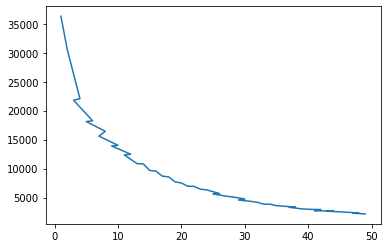

In [26]:
freq_count = pensActivity.groupby(["visit_id"]).count_items.sum()
freq_count = freq_count.to_frame()

less_fifthy_items = freq_count[freq_count['count_items'] < 50]
more_than_zero = less_fifthy_items[less_fifthy_items['count_items'] > 0]
more_than_zero['count_items'].value_counts().plot(x='counts_items', y='count_visits')
# sharp dropoff between 0-5, most visits collected 0 
# the range between 10-40 iis also pretty active

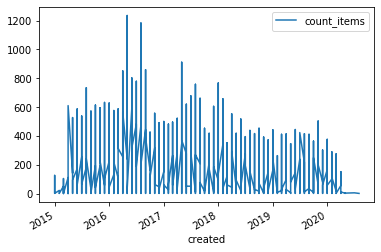

In [27]:
plt.rcParams['agg.path.chunksize'] = 40000

items_by_date = pensActivity[['count_items', 'created']]
freq_count_by_date = items_by_date.groupby(['count_items', pd.Grouper(key='created', freq='M')]).agg('count')
freq_count_by_date.reset_index().plot(x='created', y='count_items')

#### count items in adam timeframe

In [28]:
#zooming to Adam timeframe 
start_date = '01-01-2019'
end_date = '07-31-2019'
mask = (pensActivity['created'] > start_date) & (pensActivity['created'] <= end_date)
sevenMonths = pensActivity.loc[mask]
count_seven_freg = sevenMonths.groupby(["visit_id"]).count_items.sum()
count_seven_freg = count_seven_freg.to_frame()

less_items = count_seven_freg[count_seven_freg['count_items'] < 100]

less_items['count_items'].sum()

617821

## Activity column

In [29]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option("max_colwidth", 1000)
pensActivity['activity'].iloc[0]

'{"collection":[{"record_id":1,"record_data":"chsdm:o:18500983","record_len":16,"timestamp":"00:00:04"},{"record_id":1,"record_data":"chsdm:o:18305299","record_len":16,"timestamp":"00:00:07"}],"registers":{"vibra_on":1,"tag_counter_after_low_battery_level_reached":0,"p2p_life_counter":378,"tag_life_counter":29,"pen_id":"NaN","vibra_duration":115973,"company":"0x0","tag_counter_before_low_battery_level_reached":29,"nfc_loops":16,"p2p_test_normal_mode":1,"low_battery_level_reached_since_last_reset":0,"p2p_counter_after_low_battery_level_reached":0,"p2p_counter_before_low_battery_level_reached":378},"ticket_id":"20141215u3","pen_id":"5","initial_time_stamp":"2014-12-15T15:33:19"}'

In [30]:
activity_parse = pensActivity['activity']

In [31]:
def parse(string):
    if string is None:
        return {}
    else:
        try:
            return json.loads(string)
        except ValueError:
            print(string)
            return {}
        
    
json_str = activity_parse.map(parse)

{"collection":[{"record_data":"chsdm:o:18487435","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18638637","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18615569","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18353745","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18562521","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:35460793","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18400931","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18471355","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18667891","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18758367","record_id":1,"record_len":"16","timestamp":"18:34:46"},{"record_data":"chsdm:o:18471361","record_id":1,"record_len":"16","timestamp":"18:34:

{"collection":[{"record_data":"chsdm:v:69166469","record_id":0,"record_len":"16","timestamp":"00:48:10"},{"record_data":"chsdm:o:18758389","record_id":1,"record_len":"16","timestamp":"00:48:26"},{"record_data":"chsdm:o:18733333","record_id":2,"record_len":"16","timestamp":"00:48:42"},{"record_data":"chsdm:o:69153301","record_id":3,"record_len":"16","timestamp":"00:48:48"},{"record_data":"chsdm:o:18631613","record_id":4,"record_len":"16","timestamp":"00:48:51"},{"record_data":"chsdm:o:18630461","record_id":5,"record_len":"16","timestamp":"00:48:53"},{"record_data":"chsdm:o:18630459","record_id":6,"record_len":"16","timestamp":"00:48:53"},{"record_data":"chsdm:o:18630457","record_id":7,"record_len":"16","timestamp":"00:48:53"},{"record_data":"chsdm:o:18630455","record_id":8,"record_len":"16","timestamp":"00:48:53"},{"record_data":"chsdm:o:69153299","record_id":9,"record_len":"16","timestamp":"00:48:56"},{"record_data":"chsdm:o:69153301","record_id":10,"record_len":"16","timestamp":"00:48

{"collection":[{"record_data":"chsdm:o:69155335","record_id":0,"record_len":"16","timestamp":"00:00:32"},{"record_data":"chsdm:o:69155057","record_id":1,"record_len":"16","timestamp":"00:01:31"},{"record_data":"chsdm:o:69155275","record_id":2,"record_len":"16","timestamp":"00:01:49"},{"record_data":"chsdm:o:69155275","record_id":3,"record_len":"16","timestamp":"00:02:08"},{"record_data":"chsdm:o:69155331","record_id":4,"record_len":"16","timestamp":"00:03:50"},{"record_data":"chsdm:o:69155065","record_id":5,"record_len":"16","timestamp":"00:04:03"},{"record_data":"chsdm:o:69155063","record_id":6,"record_len":"16","timestamp":"00:04:03"},{"record_data":"chsdm:o:69155003","record_id":7,"record_len":"16","timestamp":"00:04:03"},{"record_data":"chsdm:o:69155333","record_id":8,"record_len":"16","timestamp":"00:04:29"},{"record_data":"chsdm:o:69155339","record_id":9,"record_len":"16","timestamp":"00:04:52"},{"record_data":"chsdm:o:69155337","record_id":10,"record_len":"16","timestamp":"00:04

{"collection":[{"record_data":"chsdm:o:69155335","record_id":0,"record_len":"16","timestamp":"00:01:34"},{"record_data":"chsdm:o:69155335","record_id":1,"record_len":"16","timestamp":"00:01:38"},{"record_data":"chsdm:o:18383473","record_id":2,"record_len":"16","timestamp":"00:06:18"},{"record_data":"chsdm:o:18489265","record_id":3,"record_len":"16","timestamp":"00:06:20"},{"record_data":"chsdm:o:18659073","record_id":4,"record_len":"16","timestamp":"00:06:22"},{"record_data":"chsdm:o:18184945","record_id":5,"record_len":"16","timestamp":"00:06:23"},{"record_data":"chsdm:o:18468071","record_id":6,"record_len":"16","timestamp":"00:06:25"},{"record_data":"chsdm:o:18135781","record_id":7,"record_len":"16","timestamp":"00:06:27"},{"record_data":"chsdm:o:18327301","record_id":8,"record_len":"16","timestamp":"00:06:29"},{"record_data":"chsdm:o:18168763","record_id":9,"record_len":"16","timestamp":"00:06:32"},{"record_data":"chsdm:o:18489265","record_id":10,"record_len":"16","timestamp":"00:06

{"collection":[{"record_data":"chsdm:o:219777433","record_id":0,"record_len":"17","timestamp":"00:50:51"},{"record_data":"chsdm:o:136252991","record_id":1,"record_len":"17","timestamp":"00:50:51"},{"record_data":"chsdm:o:219777431","record_id":2,"record_len":"17","timestamp":"00:50:51"},{"record_data":"chsdm:o:219777427","record_id":3,"record_len":"17","timestamp":"00:50:51"},{"record_data":"chsdm:o:18624741","record_id":4,"record_len":"16","timestamp":"00:51:38"},{"record_data":"chsdm:o:18636273","record_id":5,"record_len":"16","timestamp":"00:51:40"},{"record_data":"chsdm:o:18468069","record_id":6,"record_len":"16","timestamp":"00:51:42"},{"record_data":"chsdm:o:18670471","record_id":7,"record_len":"16","timestamp":"00:51:53"},{"record_data":"chsdm:o:18732761","record_id":8,"record_len":"16","timestamp":"00:51:54"},{"record_data":"chsdm:o:18636375","record_id":9,"record_len":"16","timestamp":"00:51:56"},{"record_data":"chsdm:o:136253113","record_id":10,"record_len":"17","timestamp":"

{"collection":[{"record_data":"chsdm:o:69155387","record_id":0,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155385","record_id":1,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155399","record_id":2,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155391","record_id":3,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155389","record_id":4,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155405","record_id":5,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155381","record_id":6,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155395","record_id":7,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155403","record_id":8,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155383","record_id":9,"record_len":"16","timestamp":"00:08:07"},{"record_data":"chsdm:o:69155401","record_id":10,"record_len":"16","timestamp":"00:08

{"collection":[{"record_data":"chsdm:o:69155335","record_id":0,"record_len":"16","timestamp":"00:00:58"},{"record_data":"chsdm:o:18539583","record_id":1,"record_len":"16","timestamp":"00:02:39"},{"record_data":"chsdm:o:18459937","record_id":2,"record_len":"16","timestamp":"00:02:44"},{"record_data":"chsdm:o:18423571","record_id":3,"record_len":"16","timestamp":"00:02:49"},{"record_data":"chsdm:o:68250939","record_id":4,"record_len":"16","timestamp":"00:02:53"},{"record_data":"chsdm:o:18660393","record_id":5,"record_len":"16","timestamp":"00:03:05"},{"record_data":"chsdm:o:420565351","record_id":6,"record_len":"17","timestamp":"00:03:11"},{"record_data":"chsdm:o:420564073","record_id":7,"record_len":"17","timestamp":"00:03:11"},{"record_data":"chsdm:o:420564063","record_id":8,"record_len":"17","timestamp":"00:03:11"},{"record_data":"chsdm:o:420564061","record_id":9,"record_len":"17","timestamp":"00:03:11"},{"record_data":"chsdm:o:420564057","record_id":10,"record_len":"17","timestamp":"

{"collection":[{"record_data":"chsdm:o:102147229","record_id":0,"record_len":"17","timestamp":"00:09:07"},{"record_data":"chsdm:o:135726729","record_id":1,"record_len":"17","timestamp":"00:09:10"},{"record_data":"chsdm:o:135726733","record_id":2,"record_len":"17","timestamp":"00:09:13"},{"record_data":"chsdm:o:135726735","record_id":3,"record_len":"17","timestamp":"00:09:15"},{"record_data":"chsdm:o:135726743","record_id":4,"record_len":"17","timestamp":"00:09:17"},{"record_data":"chsdm:o:135726737","record_id":5,"record_len":"17","timestamp":"00:09:18"},{"record_data":"chsdm:o:135726731","record_id":6,"record_len":"17","timestamp":"00:09:21"},{"record_data":"chsdm:o:135726761","record_id":7,"record_len":"17","timestamp":"00:09:29"},{"record_data":"chsdm:o:135726757","record_id":8,"record_len":"17","timestamp":"00:09:29"},{"record_data":"chsdm:o:136252489","record_id":9,"record_len":"17","timestamp":"00:09:36"},{"record_data":"chsdm:o:136252483","record_id":10,"record_len":"17","timest

{"collection":[{"record_data":"chsdm:o:136252489","record_id":0,"record_len":"17","timestamp":"00:20:12"},{"record_data":"chsdm:o:136252483","record_id":1,"record_len":"17","timestamp":"00:20:12"},{"record_data":"chsdm:o:219777349","record_id":2,"record_len":"17","timestamp":"00:20:12"},{"record_data":"chsdm:o:136252623","record_id":3,"record_len":"17","timestamp":"00:20:12"},{"record_data":"chsdm:o:136252489","record_id":4,"record_len":"17","timestamp":"00:20:16"},{"record_data":"chsdm:o:136252483","record_id":5,"record_len":"17","timestamp":"00:20:16"},{"record_data":"chsdm:o:219777349","record_id":6,"record_len":"17","timestamp":"00:20:16"},{"record_data":"chsdm:o:136252623","record_id":7,"record_len":"17","timestamp":"00:20:16"},{"record_data":"chsdm:o:219777441","record_id":8,"record_len":"17","timestamp":"00:21:05"},{"record_data":"chsdm:o:219777443","record_id":9,"record_len":"17","timestamp":"00:21:05"},{"record_data":"chsdm:o:219777439","record_id":10,"record_len":"17","timest

{"collection":[{"record_data":"chsdm:o:69155193","record_id":0,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155191","record_id":1,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155189","record_id":2,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155187","record_id":3,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155183","record_id":4,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155185","record_id":5,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155179","record_id":6,"record_len":"16","timestamp":"00:04:50"},{"record_data":"chsdm:o:69155171","record_id":7,"record_len":"16","timestamp":"00:06:16"},{"record_data":"chsdm:o:69155169","record_id":8,"record_len":"16","timestamp":"00:06:16"},{"record_data":"chsdm:o:69155167","record_id":9,"record_len":"16","timestamp":"00:06:16"},{"record_data":"chsdm:o:102199993","record_id":10,"record_len":"17","timestamp":"00:0

{"collection":[{"record_data":"chsdm:o:18184945","record_id":0,"record_len":"16","timestamp":"00:01:45"},{"record_data":"chsdm:o:18659073","record_id":1,"record_len":"16","timestamp":"00:01:47"},{"record_data":"chsdm:o:18489265","record_id":2,"record_len":"16","timestamp":"00:01:49"},{"record_data":"chsdm:o:18383473","record_id":3,"record_len":"16","timestamp":"00:01:51"},{"record_data":"chsdm:o:18383475","record_id":4,"record_len":"16","timestamp":"00:01:53"},{"record_data":"chsdm:o:18464653","record_id":5,"record_len":"16","timestamp":"00:01:55"},{"record_data":"chsdm:o:420565351","record_id":6,"record_len":"17","timestamp":"00:01:57"},{"record_data":"chsdm:o:420564073","record_id":7,"record_len":"17","timestamp":"00:01:57"},{"record_data":"chsdm:o:420564063","record_id":8,"record_len":"17","timestamp":"00:01:57"},{"record_data":"chsdm:o:420564061","record_id":9,"record_len":"17","timestamp":"00:01:57"},{"record_data":"chsdm:o:420564057","record_id":10,"record_len":"17","timestamp":"

{"collection":[{"record_data":"chsdm:o:69155335","record_id":0,"record_len":"16","timestamp":"01:58:24"},{"record_data":"chsdm:o:69155335","record_id":1,"record_len":"16","timestamp":"01:58:31"},{"record_data":"chsdm:o:69155335","record_id":2,"record_len":"16","timestamp":"01:58:32"},{"record_data":"chsdm:o:69155335","record_id":3,"record_len":"16","timestamp":"01:58:34"},{"record_data":"chsdm:o:69155335","record_id":4,"record_len":"16","timestamp":"01:58:35"},{"record_data":"chsdm:o:69155335","record_id":5,"record_len":"16","timestamp":"01:58:50"},{"record_data":"chsdm:o:69155335","record_id":6,"record_len":"16","timestamp":"01:58:52"},{"record_data":"chsdm:o:69155335","record_id":7,"record_len":"16","timestamp":"01:58:53"},{"record_data":"chsdm:o:69155335","record_id":8,"record_len":"16","timestamp":"01:58:59"},{"record_data":"chsdm:o:69155335","record_id":9,"record_len":"16","timestamp":"01:59:08"},{"record_data":"chsdm:o:69155335","record_id":10,"record_len":"16","timestamp":"01:59

{"collection":[{"record_data":"chsdm:o:404584055","record_id":0,"record_len":"17","timestamp":"03:25:22"},{"record_data":"chsdm:o:404584057","record_id":1,"record_len":"17","timestamp":"03:25:22"},{"record_data":"chsdm:o:69155071","record_id":2,"record_len":"16","timestamp":"03:25:22"},{"record_data":"chsdm:o:69155387","record_id":3,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155385","record_id":4,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155399","record_id":5,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155391","record_id":6,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155389","record_id":7,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155405","record_id":8,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155381","record_id":9,"record_len":"16","timestamp":"03:25:39"},{"record_data":"chsdm:o:69155395","record_id":10,"record_len":"16","timestamp":"03:

{"collection":[{"record_data":"chsdm:o:18187831","record_id":0,"record_len":"16","timestamp":"00:00:32"},{"record_data":"chsdm:o::o:404529349","record_id":1,"record_len":"20","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529351","record_id":2,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529347","record_id":3,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529339","record_id":4,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529343","record_id":5,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529341","record_id":6,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529337","record_id":7,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529333","record_id":8,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529335","record_id":9,"record_len":"17","timestamp":"00:07:10"},{"record_data":"chsdm:o:404529331","record_id":10,"record_len":"17","time

{"collection":[{"record_data":"chsdm:o:69155335","record_id":0,"record_len":"16","timestamp":"01:01:25"},{"record_data":"chsdm:o:69155377","record_id":1,"record_len":"16","timestamp":"01:02:27"},{"record_data":"chsdm:o:404584055","record_id":2,"record_len":"17","timestamp":"01:03:01"},{"record_data":"chsdm:o:404584057","record_id":3,"record_len":"17","timestamp":"01:03:01"},{"record_data":"chsdm:o:69155071","record_id":4,"record_len":"16","timestamp":"01:03:01"},{"record_data":"chsdm:o:69155387","record_id":5,"record_len":"16","timestamp":"01:03:43"},{"record_data":"chsdm:o:69155385","record_id":6,"record_len":"16","timestamp":"01:03:43"},{"record_data":"chsdm:o:69155399","record_id":7,"record_len":"16","timestamp":"01:03:43"},{"record_data":"chsdm:o:69155391","record_id":8,"record_len":"16","timestamp":"01:03:43"},{"record_data":"chsdm:o:69155389","record_id":9,"record_len":"16","timestamp":"01:03:43"},{"record_data":"chsdm:o:69155405","record_id":10,"record_len":"16","timestamp":"01:

{"collection":[{"record_data":"chsdm:o:18378445","record_id":0,"record_len":"16","timestamp":"00:00:45"},{"record_data":"chsdm:o:18409533","record_id":1,"record_len":"16","timestamp":"00:00:48"},{"record_data":"chsdm:o:18575325","record_id":2,"record_len":"16","timestamp":"00:01:00"},{"record_data":"chsdm:o:18572345","record_id":3,"record_len":"16","timestamp":"00:01:03"},{"record_data":"chsdm:o:18572227","record_id":4,"record_len":"16","timestamp":"00:01:04"},{"record_data":"chsdm:o:18381973","record_id":5,"record_len":"16","timestamp":"00:01:08"},{"record_data":"chsdm:o:18539627","record_id":6,"record_len":"16","timestamp":"00:01:17"},{"record_data":"chsdm:o:69143665","record_id":7,"record_len":"16","timestamp":"00:01:18"},{"record_data":"chsdm:o:404527623","record_id":8,"record_len":"17","timestamp":"00:01:21"},{"record_data":"chsdm:o:18378443","record_id":9,"record_len":"16","timestamp":"00:01:28"},{"record_data":"chsdm:o:18378441","record_id":10,"record_len":"16","timestamp":"00:0

{"collection":[{"record_data":"chsdm:o:69155013","record_id":0,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155009","record_id":1,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155007","record_id":2,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69154997","record_id":3,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69154999","record_id":4,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155005","record_id":5,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155017","record_id":6,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155015","record_id":7,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155011","record_id":8,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:69155057","record_id":9,"record_len":"16","timestamp":"06:16:14"},{"record_data":"chsdm:o:102335191","record_id":10,"record_len":"17","timestamp":"06:1

{"collection":[{"record_data":"chsdm:o:907131605","record_id":0,"record_len":"17","timestamp":"00:57:43"},{"record_data":"chsdm:o:907214293","record_id":1,"record_len":"17","timestamp":"00:57:47"},{"record_data":"chsdm:o:18343959","record_id":2,"record_len":"16","timestamp":"00:57:49"},{"record_data":"chsdm:o:907130359","record_id":3,"record_len":"17","timestamp":"00:57:51"},{"record_data":"chsdm:o:404536641","record_id":4,"record_len":"17","timestamp":"00:57:55"},{"record_data":"chsdm:o:18353701","record_id":5,"record_len":"16","timestamp":"00:57:57"},{"record_data":"chsdm:o:908038735","record_id":6,"record_len":"17","timestamp":"00:58:03"},{"record_data":"chsdm:o:907130253","record_id":7,"record_len":"17","timestamp":"00:58:06"},{"record_data":"chsdm:o:35521009","record_id":8,"record_len":"16","timestamp":"00:58:08"},{"record_data":"chsdm:o:404536663","record_id":9,"record_len":"17","timestamp":"00:58:11"},{"record_data":"chsdm:o:18794697","record_id":10,"record_len":"16","timestamp"

{"collection":[{"record_data":"chsdm:o:18187831","record_id":0,"record_len":"16","timestamp":"00:01:50"},{"record_data":"chsdm:o:907130101","record_id":1,"record_len":"17","timestamp":"00:07:03"},{"record_data":"chsdm:o:18312593","record_id":2,"record_len":"16","timestamp":"00:07:08"},{"record_data":"chsdm:o:18574871","record_id":3,"record_len":"16","timestamp":"00:07:12"},{"record_data":"chsdm:o:18574871","record_id":4,"record_len":"16","timestamp":"00:07:55"},{"record_data":"chsdm:o:907214171","record_id":5,"record_len":"17","timestamp":"00:08:04"},{"record_data":"chsdm:o:907214199","record_id":6,"record_len":"17","timestamp":"00:08:06"},{"record_data":"chsdm:o:907130393","record_id":7,"record_len":"17","timestamp":"00:08:18"},{"record_data":"chsdm:o:907130427","record_id":8,"record_len":"17","timestamp":"00:08:20"},{"record_data":"chsdm:o:907214249","record_id":9,"record_len":"17","timestamp":"00:08:23"},{"record_data":"chsdm:o:907214133","record_id":10,"record_len":"17","timestamp"

{"collection":[{"record_data":"chsdm:o:1108723777","record_id":0,"record_len":"18","timestamp":"00:03:09"},{"record_data":"chsdm:o:68813711","record_id":1,"record_len":"16","timestamp":"00:03:09"},{"record_data":"chsdm:o:1108723777","record_id":2,"record_len":"18","timestamp":"00:03:18"},{"record_data":"chsdm:o:68813711","record_id":3,"record_len":"16","timestamp":"00:03:18"},{"record_data":"chsdm:o:1108723777","record_id":4,"record_len":"18","timestamp":"00:03:55"},{"record_data":"chsdm:o:68813711","record_id":5,"record_len":"16","timestamp":"00:03:55"},{"record_data":"chsdm:o:1108723781","record_id":6,"record_len":"18","timestamp":"00:04:17"},{"record_data":"chsdm:o:404577379","record_id":7,"record_len":"17","timestamp":"00:04:17"},{"record_data":"chsdm:o:907130463","record_id":8,"record_len":"17","timestamp":"00:04:25"},{"record_data":"chsdm:o:1108723791","record_id":9,"record_len":"18","timestamp":"00:04:25"},{"record_data":"chsdm:o:890290247","record_id":10,"record_len":"17","time

{"collection":[{"record_id":1,"record_data":"chsdm:o:1108750399","record_length":18,"timestamp":"01:26:01"},{"record_id":2,"record_data":"chsdm:o:18651137","record_length":16,"timestamp":"01:26:41"},{"record_id":3,"record_data":"chsdm:o:18651119","record_length":16,"timestamp":"01:26:43"},{"record_id":4,"record_data":"chsdm:o:18669115","record_length":16,"timestamp":"01:26:46"},{"record_id":5,"record_data":"chsdm:o:18768149","record_length":16,"timestamp":"01:26:48"},{"record_id":6,"record_data":"chsdm:o:18768143","record_length":16,"timestamp":"01:26:48"},{"record_id":7,"record_data":"chsdm:o:18495073","record_length":16,"timestamp":"01:26:57"},{"record_id":8,"record_data":"chsdm:o:18319945","record_length":16,"timestamp":"01:26:59"},{"record_id":9,"record_data":"chsdm:o:1108754281","record_length":18,"timestamp":"01:27:01"},{"record_id":10,"record_data":"chsdm:o:69122329","record_length":16,"timestamp":"01:27:06"},{"record_id":11,"record_data":"chsdm:o:18497979","record_length":16,"t

In [32]:
json_str.map(lambda row: row.get('collection'))

131729                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [{'record_id': 1, 'record_data': 'chsdm:o:18500983', 'record_len': 16, 'timestamp': '00:00:04'}, {'record_id': 1, 'record_data': 'chsdm:o:18305299', 'record_len': 16, 'timestamp': '00:00:07'}]
628374    [{'record_id': 1, 'record_data': 'Uchsdm:o:18797297;18796201;35460625;35474659;68245681;18740273;51685081;68268445;52027703;18797267;68268299', 'record_len': 110, 'timestamp': '0:35:54'}, {'record_id'

In [33]:
json_list = list(json_str)
json_list[30]

{'pen_uid': '91ff826f1d001500',
 'initial_time_stamp': '#2014-12-18T17:42:26',
 'unit_id': 'ffff',
 'registers': '',
 'ticket_id': 'n5cd',
 'collection': [{'record_id': 1,
   'record_data': 'Uchsdm:o:68268457;18731063;68731007;18797477;51685175;51589113;18620635;68268575;68246011',
   'record_len': 92,
   'timestamp': '0:13:23'},
  {'record_id': 2,
   'record_data': 'Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853',
   'record_len': 83,
   'timestamp': '0:13:26'},
  {'record_id': 3,
   'record_data': 'Uchsdm:o:18633615',
   'record_len': 20,
   'timestamp': '0:13:49'},
  {'record_id': 4,
   'record_data': 'Uchsdm:o:18649321',
   'record_len': 20,
   'timestamp': '0:13:53'},
  {'record_id': 5,
   'record_data': 'Uchsdm:o:51681337',
   'record_len': 20,
   'timestamp': '0:15:14'},
  {'record_id': 6,
   'record_data': 'Uchsdm:o:35460843',
   'record_len': 20,
   'timestamp': '0:15:58'},
  {'record_id': 7,
   'record_data': 'Uchsdm:o:18348701',
   'record_l

In [34]:
activity_df = pd.json_normalize(json_list)
collection_json = activity_df['collection']
activity_df

,collection,ticket_id,pen_id,initial_time_stamp,registers.vibra_on,registers.tag_counter_after_low_battery_level_reached,registers.p2p_life_counter,registers.tag_life_counter,registers.pen_id,registers.vibra_duration,registers.company,registers.tag_counter_before_low_battery_level_reached,registers.nfc_loops,registers.p2p_test_normal_mode,registers.low_battery_level_reached_since_last_reset,registers.p2p_counter_after_low_battery_level_reached,registers.p2p_counter_before_low_battery_level_reached,pen_uid,unit_id,registers,initial_timestamp,registers.pen_uid,registers.unit_id
0,"[{'record_id': 1, 'record_data': 'chsdm:o:18500983', 'record_len': 16, 'timestamp': '00:00:04'}, {'record_id': 1, 'record_data': 'chsdm:o:18305299', 'record_len': 16, 'timestamp': '00:00:07'}]",20141215u3,5,2014-12-15T15:33:19,1.0,0.0,378.0,29.0,NaN,115973.0,0x0,29.0,16.0,1.0,0.0,0.0,378.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'record_id': 1, 'record_data': 'Uchsdm:o:18797297;18796201;35460625;35474659;68245681;18740273;51685081;68268445;52027703;18797267;68268299', 'record_len': 110, 'timestamp': '0:35:54'}, {'record_id': 2, 'record_data': 'Uchsdm:o:18732295', 'record_len': 20, 'timestamp': '0:36:21'}, {'record_id': 3, 'record_data': 'Uchsdm:o:51497725;51497729;51497727', 'record_len': 38, 'timestamp': '0:37:1'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51497641', 'record_len': 20, 'timestamp': '0:37:4'}, {'record_id': 5, 'record_data': 'Uchsdm:o:18319405', 'record_len': 20, 'timestamp': '0:38:42'}, {'record_id': 6, 'record_data': 'Uchsdm:o:18708929', 'record_len': 20, 'timestamp': '0:39:13'}, {'record_id': 7, 'record_data': 'Uchsdm:o:51681337', 'record_len': 20, 'timestamp': '0:39:27'}]",sx6w,NaN,#2014-12-15T15:06:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91ff826f0b001e00,ffff,,NaN,NaN,NaN
2,"[{'record_id': 1, 'record_data': 'Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853', 'record_len': 83, 'timestamp': '0:34:27'}, {'record_id': 2, 'record_data': 'Uchsdm:o:18732295', 'record_len': 20, 'timestamp': '0:34:46'}, {'record_id': 3, 'record_data': 'Uchsdm:o:51497637', 'record_len': 20, 'timestamp': '0:35:11'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51681757', 'record_len': 20, 'timestamp': '0:35:50'}, {'record_id': 5, 'record_data': 'Uchsdm:o:18319359', 'record_len': 20, 'timestamp': '0:37:0'}]",5cmh,NaN,#2014-12-15T15:08:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90ff826f0a001d00,ffff,,NaN,NaN,NaN
3,"[{'record_id': 1, 'record_data': 'Uchsdm:o:68268457;18731063;68731007;18797477;51685175;51589113;18620635;68268575;68246011', 'record_len': 92, 'timestamp': '0:34:44'}, {'record_id': 2, 'record_data': 'Uchsdm:o:18732761', 'record_len': 20, 'timestamp': '0:35:20'}, {'record_id': 3, 'record_data': 'Uchsdm:o:51497723', 'record_len': 20, 'timestamp': '0:35:46'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51497211', 'record_len': 20, 'timestamp': '0:37:2'}, {'record_id': 5, 'record_data': 'Uchsdm:o:51497517', 'record_len': 20, 'timestamp': '0:37:50'}, {'record_id': 6, 'record_data': 'Uchsdm:o:18728283', 'record_len': 20, 'timestamp': '0:38:11'}]",cwzn,NaN,#2014-12-15T15:07:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91ff826f08001b00,ffff,,NaN,NaN,NaN
4,"[{'record_id': 1, 'record_data': 'Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853', 'record_len': 83, 'timestamp': '0:34:41'}, {'record_id': 2, 'record_data': 'Uchsdm:o:51497605', 'record_len': 20, 'timestamp': '0:35:34'}, {'record_id': 3, 'record_data': 'Uchsdm:v:68764309', 'record_len': 20, 'timestamp': '0:35:52'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51681733;51681743;51681747;51681741;51681739;51681745;51681751;51681749;51681737', 'record_len': 92, 'timestamp': '0:36:14'}, {'record_id': 5, 'record_data': 'Uchsdm:o:18489665', 'record_len': 20, 'timestamp': '0:38:19'}, {'record_id': 6, 'record_data': 'Uchsdm:o:18788347', 'record_len': 20, 'timestamp': '0:38:29'}]",nzs2,NaN,#2014-12-15T15:07:23,NaN,NaN,NaN,NaN,NaN

In [35]:
def record_map(record):
    try:
        return list(map(lambda data: data['record_data'], record))
    except TypeError:
        return None

activity_df['record_data'] = activity_df['collection'].apply(record_map)

In [36]:
activity_df

,collection,ticket_id,pen_id,initial_time_stamp,registers.vibra_on,registers.tag_counter_after_low_battery_level_reached,registers.p2p_life_counter,registers.tag_life_counter,registers.pen_id,registers.vibra_duration,registers.company,registers.tag_counter_before_low_battery_level_reached,registers.nfc_loops,registers.p2p_test_normal_mode,registers.low_battery_level_reached_since_last_reset,registers.p2p_counter_after_low_battery_level_reached,registers.p2p_counter_before_low_battery_level_reached,pen_uid,unit_id,registers,initial_timestamp,registers.pen_uid,registers.unit_id,record_data
0,"[{'record_id': 1, 'record_data': 'chsdm:o:18500983', 'record_len': 16, 'timestamp': '00:00:04'}, {'record_id': 1, 'record_data': 'chsdm:o:18305299', 'record_len': 16, 'timestamp': '00:00:07'}]",20141215u3,5,2014-12-15T15:33:19,1.0,0.0,378.0,29.0,NaN,115973.0,0x0,29.0,16.0,1.0,0.0,0.0,378.0,NaN,NaN,NaN,NaN,NaN,NaN,"[chsdm:o:18500983, chsdm:o:18305299]"
1,"[{'record_id': 1, 'record_data': 'Uchsdm:o:18797297;18796201;35460625;35474659;68245681;18740273;51685081;68268445;52027703;18797267;68268299', 'record_len': 110, 'timestamp': '0:35:54'}, {'record_id': 2, 'record_data': 'Uchsdm:o:18732295', 'record_len': 20, 'timestamp': '0:36:21'}, {'record_id': 3, 'record_data': 'Uchsdm:o:51497725;51497729;51497727', 'record_len': 38, 'timestamp': '0:37:1'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51497641', 'record_len': 20, 'timestamp': '0:37:4'}, {'record_id': 5, 'record_data': 'Uchsdm:o:18319405', 'record_len': 20, 'timestamp': '0:38:42'}, {'record_id': 6, 'record_data': 'Uchsdm:o:18708929', 'record_len': 20, 'timestamp': '0:39:13'}, {'record_id': 7, 'record_data': 'Uchsdm:o:51681337', 'record_len': 20, 'timestamp': '0:39:27'}]",sx6w,NaN,#2014-12-15T15:06:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91ff826f0b001e00,ffff,,NaN,NaN,NaN,"[Uchsdm:o:18797297;18796201;35460625;35474659;68245681;18740273;51685081;68268445;52027703;18797267;68268299, Uchsdm:o:18732295, Uchsdm:o:51497725;51497729;51497727, Uchsdm:o:51497641, Uchsdm:o:18319405, Uchsdm:o:18708929, Uchsdm:o:51681337]"
2,"[{'record_id': 1, 'record_data': 'Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853', 'record_len': 83, 'timestamp': '0:34:27'}, {'record_id': 2, 'record_data': 'Uchsdm:o:18732295', 'record_len': 20, 'timestamp': '0:34:46'}, {'record_id': 3, 'record_data': 'Uchsdm:o:51497637', 'record_len': 20, 'timestamp': '0:35:11'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51681757', 'record_len': 20, 'timestamp': '0:35:50'}, {'record_id': 5, 'record_data': 'Uchsdm:o:18319359', 'record_len': 20, 'timestamp': '0:37:0'}]",5cmh,NaN,#2014-12-15T15:08:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90ff826f0a001d00,ffff,,NaN,NaN,NaN,"[Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853, Uchsdm:o:18732295, Uchsdm:o:51497637, Uchsdm:o:51681757, Uchsdm:o:18319359]"
3,"[{'record_id': 1, 'record_data': 'Uchsdm:o:68268457;18731063;68731007;18797477;51685175;51589113;18620635;68268575;68246011', 'record_len': 92, 'timestamp': '0:34:44'}, {'record_id': 2, 'record_data': 'Uchsdm:o:18732761', 'record_len': 20, 'timestamp': '0:35:20'}, {'record_id': 3, 'record_data': 'Uchsdm:o:51497723', 'record_len': 20, 'timestamp': '0:35:46'}, {'record_id': 4, 'record_data': 'Uchsdm:o:51497211', 'record_len': 20, 'timestamp': '0:37:2'}, {'record_id': 5, 'record_data': 'Uchsdm:o:51497517', 'record_len': 20, 'timestamp': '0:37:50'}, {'record_id': 6, 'record_data': 'Uchsdm:o:18728283', 'record_len': 20, 'timestamp': '0:38:11'}]",cwzn,NaN,#2014-12-15T15:07:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91ff826f08001b00,ffff,,NaN,NaN,NaN,"[Uchsdm:o:68268457;18731063;68731007;18797477;51685175;51589113;18620635;68268575;68246011, Uchsdm:o:18732761, Uchsdm:o:51497723, Uchsdm:o:51497211, Uchsdm:o:51497517, Uchsdm:o:18728283]"
4,"[{'record_id': 1, 'record_data': 'Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853', 

In [37]:
activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892213 entries, 0 to 892212
Data columns (total 24 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   collection                                              892170 non-null  object 
 1   ticket_id                                               892170 non-null  object 
 2   pen_id                                                  1621 non-null    object 
 3   initial_time_stamp                                      892165 non-null  object 
 4   registers.vibra_on                                      886442 non-null  float64
 5   registers.tag_counter_after_low_battery_level_reached   886442 non-null  float64
 6   registers.p2p_life_counter                              886442 non-null  float64
 7   registers.tag_life_counter                              886442 non-null  float64
 8   registers.pen_id        

In [41]:
activity_clean_df = activity_df.drop(['collection', 'registers.vibra_on', 'registers.tag_counter_after_low_battery_level_reached', 'registers.p2p_life_counter',
                'registers.tag_life_counter', 'registers.pen_id', 'registers.vibra_duration', 'registers.company',
                'registers.tag_counter_before_low_battery_level_reached', 'registers.nfc_loops', 'registers.p2p_test_normal_mode',
                'registers.low_battery_level_reached_since_last_reset', 'registers.p2p_counter_after_low_battery_level_reached',
                'registers.p2p_counter_before_low_battery_level_reached', 'unit_id', 'registers', 'initial_timestamp',
                'registers.pen_uid', 'registers.unit_id'], axis=1)

In [42]:
activity_clean_df
#once I join ticket_id to activity I can explore this data_records forward as I merge it with the right order. 

,ticket_id,pen_id,initial_time_stamp,pen_uid,record_data
0,20141215u3,5,2014-12-15T15:33:19,NaN,"[chsdm:o:18500983, chsdm:o:18305299]"
1,sx6w,NaN,#2014-12-15T15:06:53,91ff826f0b001e00,"[Uchsdm:o:18797297;18796201;35460625;35474659;68245681;18740273;51685081;68268445;52027703;18797267;68268299, Uchsdm:o:18732295, Uchsdm:o:51497725;51497729;51497727, Uchsdm:o:51497641, Uchsdm:o:18319405, Uchsdm:o:18708929, Uchsdm:o:51681337]"
2,5cmh,NaN,#2014-12-15T15:08:32,90ff826f0a001d00,"[Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853, Uchsdm:o:18732295, Uchsdm:o:51497637, Uchsdm:o:51681757, Uchsdm:o:18319359]"
3,cwzn,NaN,#2014-12-15T15:07:53,91ff826f08001b00,"[Uchsdm:o:68268457;18731063;68731007;18797477;51685175;51589113;18620635;68268575;68246011, Uchsdm:o:18732761, Uchsdm:o:51497723, Uchsdm:o:51497211, Uchsdm:o:51497517, Uchsdm:o:18728283]"
4,nzs2,NaN,#2014-12-15T15:07:23,91ff826f22001600,"[Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853, Uchsdm:o:51497605, Uchsdm:v:68764309, Uchsdm:o:51681733;51681743;51681747;51681741;51681739;51681745;51681751;51681749;51681737, Uchsdm:o:18489665, Uchsdm:o:18788347]"
...,...,...,...,...,...
892208,tzctj,NaN,#2019-12-16T21:45:46,90ff826f04002300,[Uchsdm:o:18165899]
892209,gz65,NaN,#2019-12-16T21:45:46,90ff826f04002300,[Uchsdm:o:18165899]
892210,56bs6,NaN,#2019-12-16T21:45:46,90ff826f04002300,[Uchsdm:o:18165899]
892211,cvszd,NaN,#2019-12-16T21:45:46,90ff826f04002300,[Uchsdm:o:18165899]


In [47]:
pensActivity = pensActivity.drop(['activity', 'notes', 'status_id', 'time_to_process'], axis=1)

KeyError: "['activity' 'notes' 'status_id' 'time_to_process'] not found in axis"

In [48]:
pensActivity

,visit_id,pen_id,fingerprint,created,lastmodified,count_items,time_spent
131729,1509709,5,25d0ca6227e881c0f38c088d9f424737ec2773e1,2014-12-15 15:32:19,2014-12-15 15:32:19,2,00:00:00
628374,1509661,1509681,b4737a3d142bb06f6d70dd02bd64f6a956792e59,2014-12-15 15:52:19,2014-12-15 15:52:19,7,00:00:00
473963,1509705,1509673,8810c7196f7f12237868251ff4b34ffe1e2a6d99,2014-12-15 15:56:09,2014-12-15 15:56:09,5,00:00:00
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,2014-12-15 15:56:30,2014-12-15 18:11:49,6,02:15:19
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,2014-12-15 15:58:11,2014-12-15 18:10:29,6,02:12:18
...,...,...,...,...,...,...,...
494124,132777683,1524473,8de20189e64f86c4f892b98ca7d30077b00b3874,2020-07-02 20:22:39,2020-07-02 20:22:39,1,00:00:00
676664,132794701,1524473,c24003e782909cd4a8385fd84970943237aa605b,2020-07-06 17:42:37,2020-07-06 17:42:37,1,00:00:00
283113,132806719,1524473,513e424fc16895f97ae6e70e9bb74f9a58c59229,2020-07-09 13:12:38,2020-07-09 13:12:38,1,00:00:00
595596,132806727,1524473,ab224c85d1194f9136c2903b41c6f56a34d7875b,2020-07-09 13:16:52,2020-07-09 13:16:52,1,00:00:00
